In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
%matplotlib inline

In [2]:
#import dataset
df = pd.read_csv(r'C:\Users\Niko Hiananto\Downloads\vgsales.csv')

In [3]:
#check dataset
df.head(10)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
8,9,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
9,10,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


In [4]:
#dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
Rank            16598 non-null int64
Name            16598 non-null object
Platform        16598 non-null object
Year            16327 non-null float64
Genre           16598 non-null object
Publisher       16540 non-null object
NA_Sales        16598 non-null float64
EU_Sales        16598 non-null float64
JP_Sales        16598 non-null float64
Other_Sales     16598 non-null float64
Global_Sales    16598 non-null float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.1+ MB


In [5]:
#check for nulls
df.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [6]:
#data cleanup and completion
#data as of 10/26/2016 -> deprecate any data above year 2016 (data error)
df = df[df['Year'] <= 2016.0]

df[df.isnull().any(axis=1)].count()

Rank            36
Name            36
Platform        36
Year            36
Genre           36
Publisher        0
NA_Sales        36
EU_Sales        36
JP_Sales        36
Other_Sales     36
Global_Sales    36
dtype: int64

In [7]:
## copy of datafram with dropped nulls
df2 = df.dropna()
#convert year from float to int
df2['Year'] = df2['Year'].astype(np.int64, errors = 'ignore')
df2.head()

c:\users\niko hiananto\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [8]:
df2.groupby('Genre').sum()
#sns.boxplot(x = 'Genre', y = 'Global_Sales', data = )

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Genre,,,,,,,
Action,25939351,6525686,861.77,516.48,158.64,184.92,1722.83
Adventure,14704318,2558355,101.93,63.74,51.99,16.70,234.59
Fighting,6371780,1675871,220.74,100.00,87.15,36.19,444.05
Misc,14445141,3384308,396.92,211.77,106.67,73.92,789.87
Platform,6019939,1753335,445.99,200.65,130.65,51.51,829.13
Puzzle,5496785,1142980,122.01,50.52,56.68,12.47,242.21
Racing,9699328,2455923,356.93,236.31,56.61,76.68,726.76
Role-Playing,11809615,2946331,326.50,187.57,350.25,59.38,923.79
Shooter,9399409,2571588,575.16,310.45,38.18,101.90,1026.20


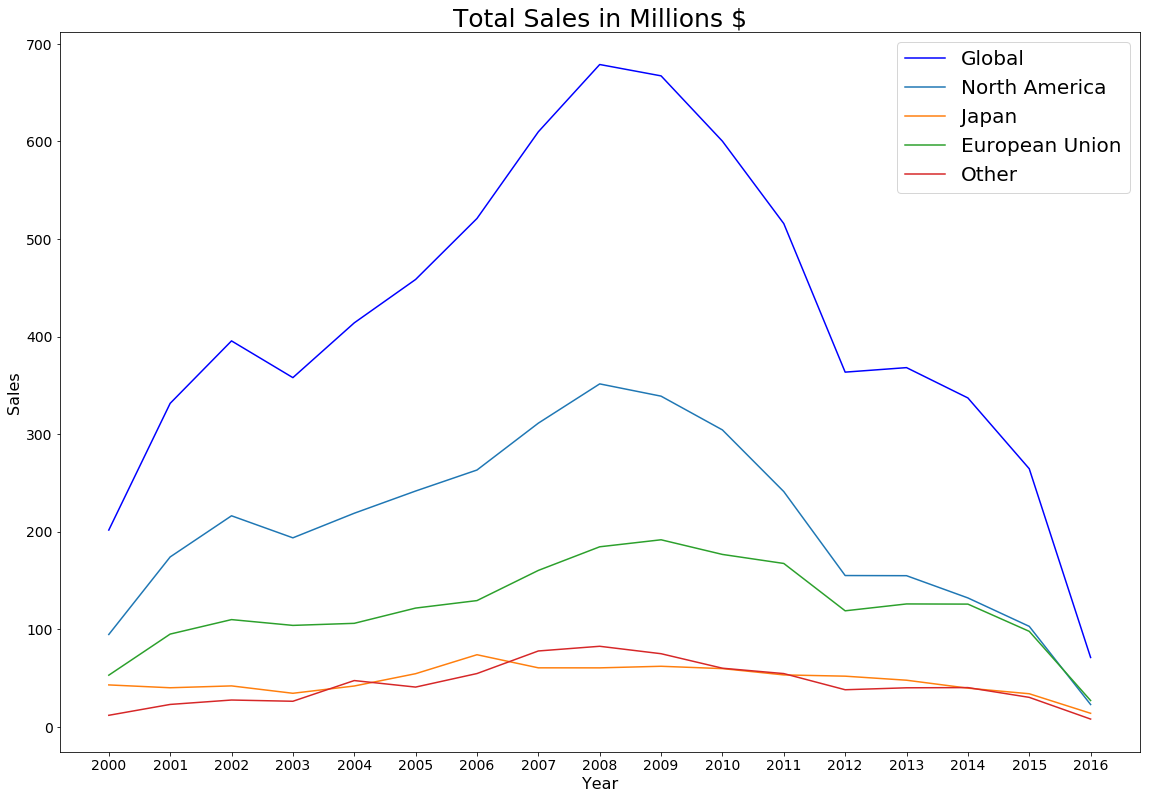

In [9]:
fig = plt.figure(figsize = (15,10))
ax = fig.add_axes([0,0,1,1])
x = df2.groupby('Year', as_index = False).sum()
x = x[x['Year'] >= 2000]


sns.lineplot(x = 'Year', y = 'Global_Sales', data = x, color = 'blue', label = 'Global', ax = ax)
sns.lineplot(x = 'Year', y = 'NA_Sales', data = x, label = 'North America', ax = ax)
sns.lineplot(x = 'Year', y = 'JP_Sales', data = x, label = 'Japan', ax = ax)
sns.lineplot(x = 'Year', y = 'EU_Sales', data = x, label = 'European Union', ax = ax)
sns.lineplot(x = 'Year', y = 'Other_Sales', data = x, label = 'Other', ax = ax)


ax.set_xlabel('Year', fontsize = 16)
ax.set_ylabel('Sales', fontsize = 16)
ax.tick_params(axis='both', which='major', labelsize=14)
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))

#plt.xticks(fontsize = 15, rotation = 90)
ax.set_title('Total Sales in Millions $', fontsize = 25)
plt.legend(fontsize = 20)

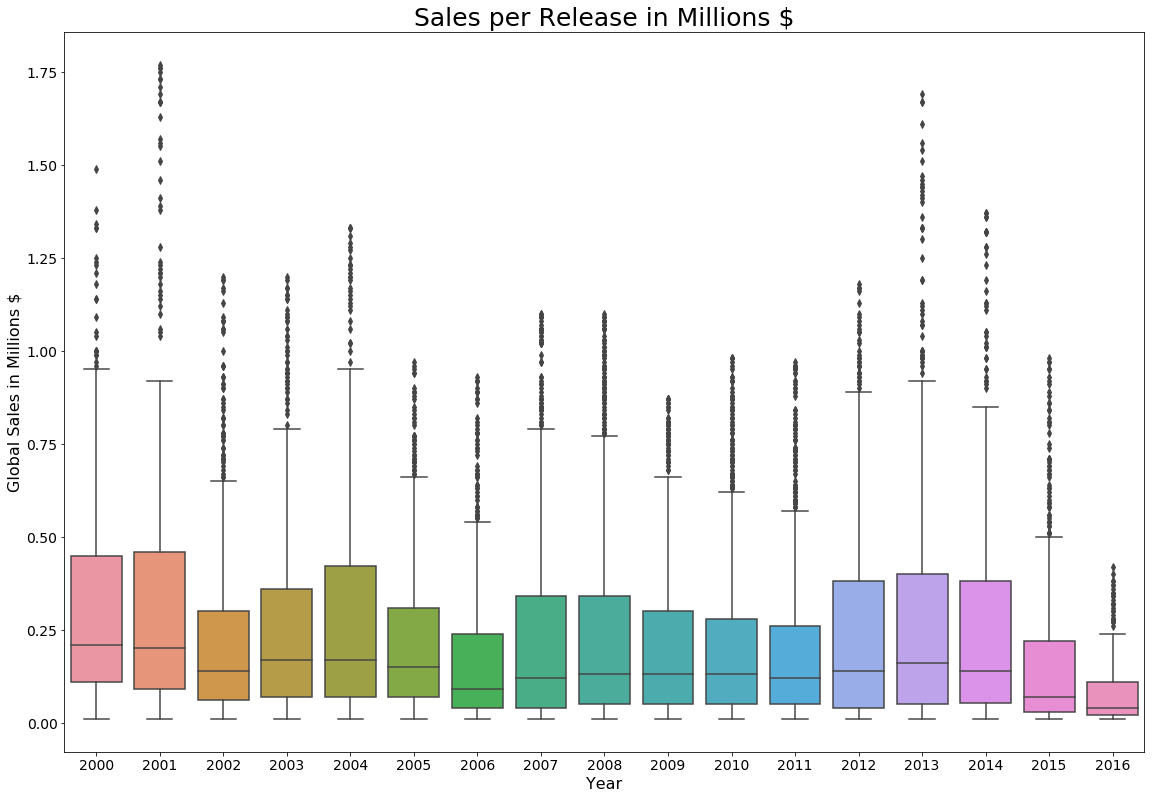

In [10]:
#Sales per release trend

def percentileplot(salescol, groupbycol):
    dfplot = df2.groupby(groupbycol, as_index = True)[salescol].quantile(0.90)
    dfplot = pd.merge(df2, dfplot.to_frame().rename(columns = {salescol : 'Percentile'}), on = groupbycol, how='left')
    dfplot = dfplot[dfplot[salescol] < dfplot['Percentile']]
    return dfplot

dfplot = percentileplot('Global_Sales','Year')
dfplot = dfplot[dfplot['Year'] >= 2000]


#fig, axes = plt.subplots(nrows = 5, ncols = 1, figsize = (15,30))
#regions = ['NA_Sales','EU_Sales','JP_Sales','Other_Sales','Global_Sales']
#plt.suptitle('Sales per Release by Region by Genre', fontsize = 20, y = 0.9)
#dfplot = df2.groupby('Year', as_index = False)[['Name','Global_Sales']].agg({'Name':'count', 'Global_Sales':'sum'}).rename(columns = {'Name':'Releases'})
#dfplot['Sales per Release'] = dfplot['Global_Sales'] / dfplot['Releases']
ax = plt.figure(figsize = (15,10)).add_axes([0,0,1,1])
sns.boxplot(x = 'Year',y = 'Global_Sales', data = dfplot, ax = ax)#, estimator = np.median)

plt.title('Sales per Release in Millions $', fontsize = 25)
ax.set_xlabel('Year', fontsize = 16)
ax.set_ylabel('Global Sales in Millions $', fontsize = 16)
ax.tick_params(axis='both', which='major', labelsize=14)



Text(0.5,1,'Global Sales by Platform')

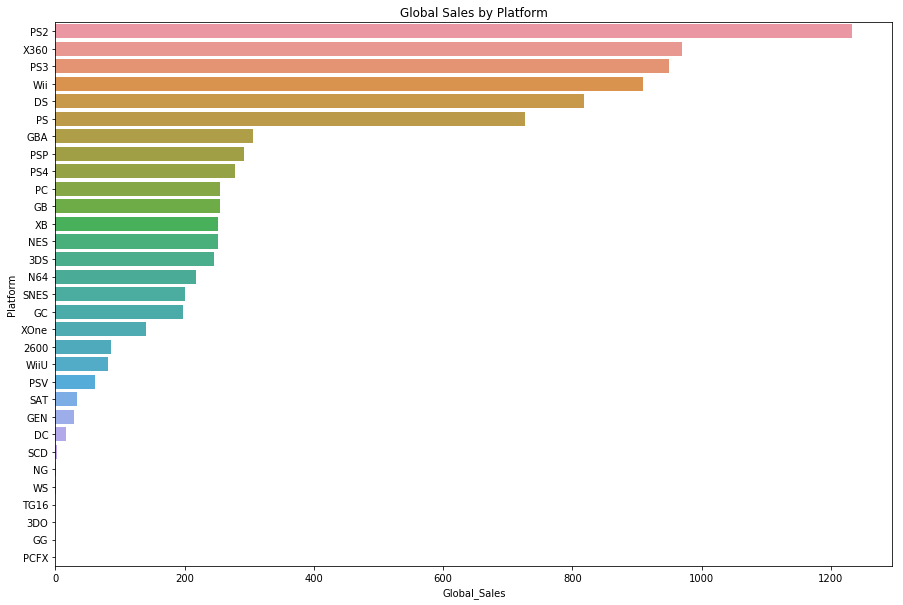

In [11]:
#Platform sales
plt.figure(figsize = (15,10))
x = df2.groupby('Platform', as_index = False).sum().sort_values(by = 'Global_Sales', ascending = False)
sns.barplot(x = 'Global_Sales',
            y = 'Platform', data = x, orient = 'h')
plt.title('Global Sales by Platform')
#ps2 dominates the market

Text(0.5,1,'Global Sales by Genre')

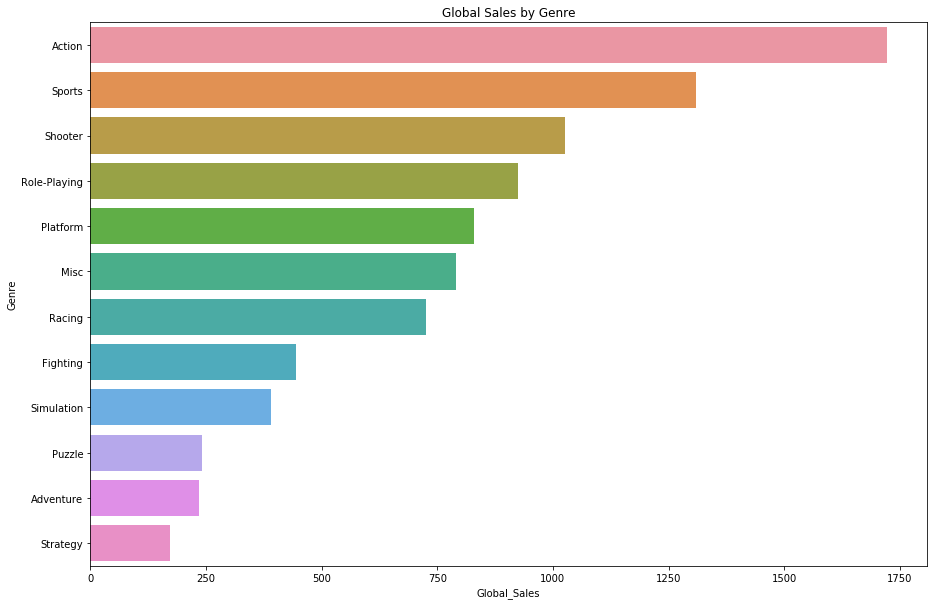

In [12]:
#Genre sales
plt.figure(figsize = (15,10))
x = df2.groupby('Genre', as_index = False).sum().sort_values(by = 'Global_Sales', ascending = False)
sns.barplot(x = 'Global_Sales',
            y = 'Genre', data = x, orient = 'h')
plt.title('Global Sales by Genre')
#action games dominate the market

Text(0.5,1,'Global Sales by Genre Across Time')

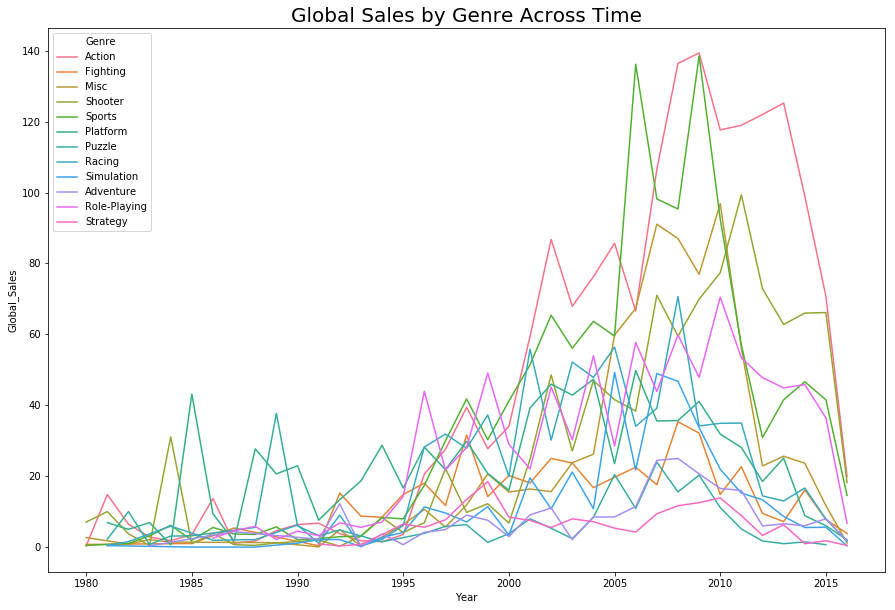

In [13]:
#Genre Trend by Year
plt.figure(figsize= (15,10))
dfplot = df2.groupby(['Year','Genre'],as_index = False)['Global_Sales'].sum()
sns.lineplot(x = 'Year',y = 'Global_Sales', data = dfplot, hue = 'Genre')
plt.title('Global Sales by Genre Across Time', fontsize = 20)

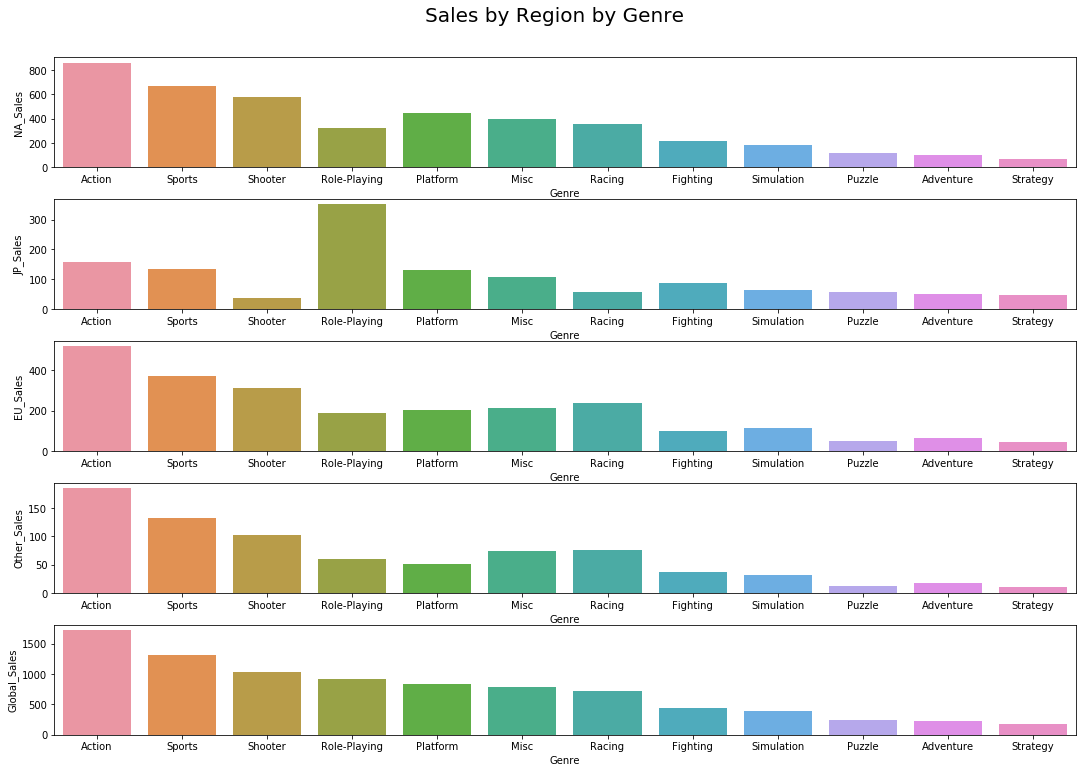

In [14]:
#sales by region by genre
dfplot = df2.groupby('Genre', as_index = False).sum().sort_values(by = 'Global_Sales', ascending = False)
region = ['NA_Sales','JP_Sales','EU_Sales','Other_Sales','Global_Sales']

fig, axes = plt.subplots(nrows = len(region), ncols = 1, figsize = (15,10))
plt.tight_layout()
plt.suptitle('Sales by Region by Genre', fontsize = 20, y = 1.05)

for i, r in enumerate(region):
    sns.barplot(y = r , x = 'Genre' , data = dfplot,  orient='v' , ax= axes[i])
    
#action is the most popular for all region except for JP where it is RPG

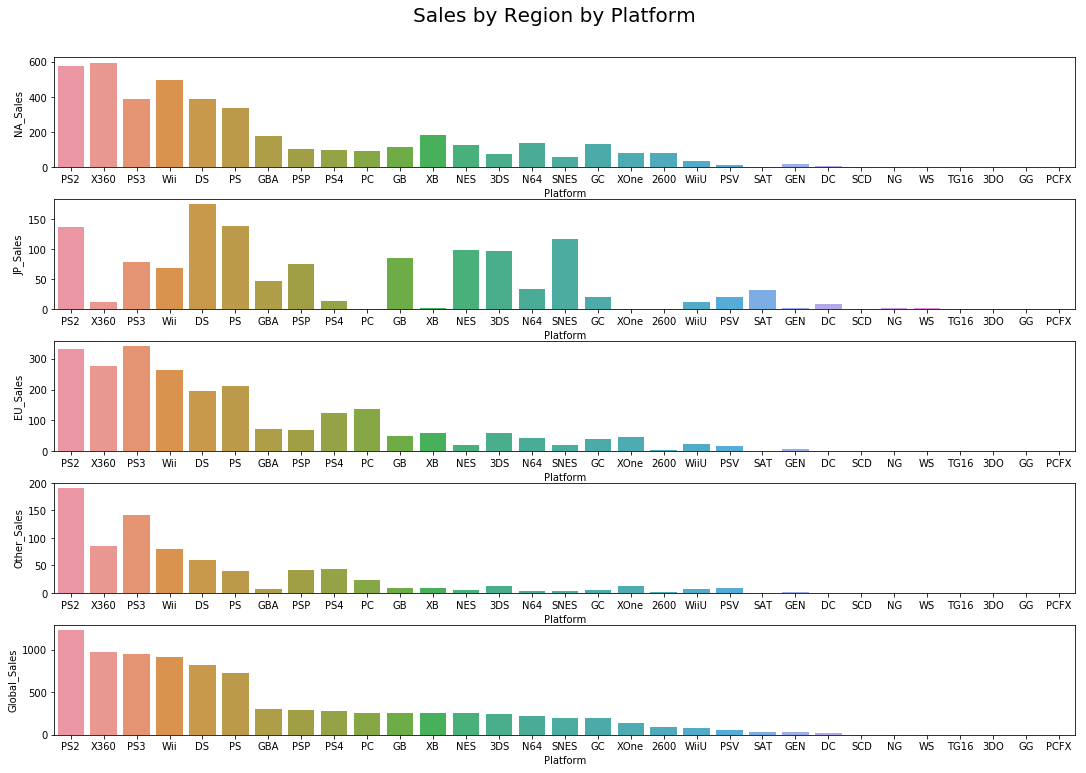

In [15]:
#sales by region by platform
dfplot = df2.groupby('Platform', as_index = False).sum().sort_values(by = 'Global_Sales', ascending = False)
region = ['NA_Sales','JP_Sales','EU_Sales','Other_Sales','Global_Sales']

fig, axes = plt.subplots(nrows = len(region), ncols = 1, figsize = (15,10))
plt.tight_layout()
plt.suptitle('Sales by Region by Platform', fontsize = 20, y = 1.05)

for i, r in enumerate(region):
    sns.barplot(y = r , x = 'Platform' , data = dfplot,  orient='v' , ax= axes[i])

Text(0.5,0,'Number of Releases')

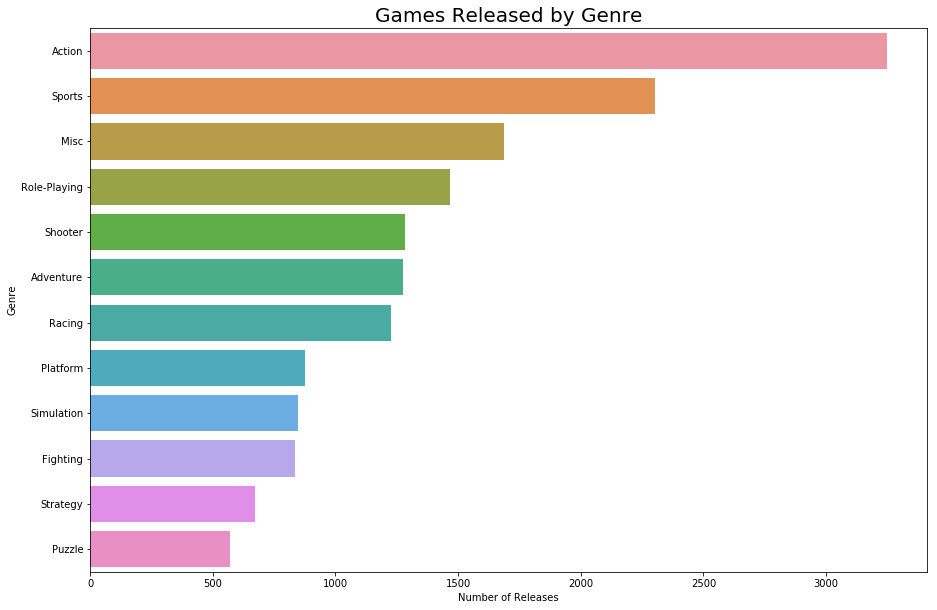

In [16]:
#Genre by Total Number of Releases
dfplot = df2.groupby('Genre' , as_index = False)[['Name', 'Global_Sales']].agg({'Name' : 'count'
                                                                                ,'Global_Sales' : 'sum'})
dfplot.columns = ['Genre','Releases','Global_Sales']
dfplot.sort_values(by = 'Releases', ascending = False, inplace = True)
plt.figure(figsize = (15,10))
plt.title('Games Released by Genre', fontsize = 20)

ax = sns.barplot(x = 'Releases', y = 'Genre', data = dfplot, orient = 'h')

ax.set_xlabel('Number of Releases')

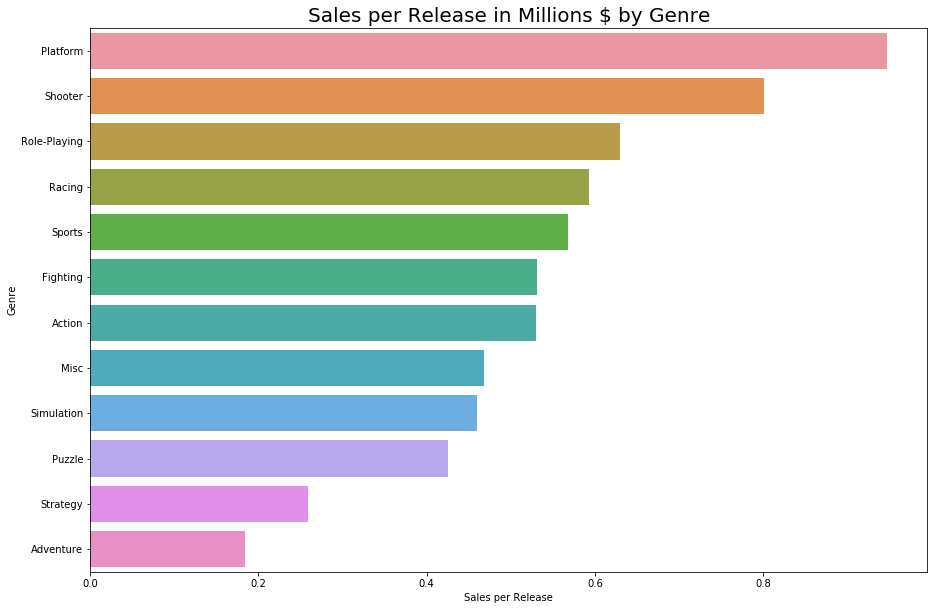

In [17]:
#Revenue per Released game by Genre
dfplot['Sales per Release'] = dfplot['Global_Sales'] / dfplot['Releases']

plt.figure(figsize = (15,10))
ax = sns.barplot(y = 'Genre', x = 'Sales per Release', data = dfplot.sort_values(by = 'Sales per Release', ascending = False)
    , orient = 'h')
plt.title('Sales per Release in Millions $ by Genre', fontsize = 20)
ax.set_xlabel = 'Sales per Release in Millions $'

#action is actually low compared to other genre in terms of sales per release
#let's look at the standard deviation within each genre
#to see if there are any games that are skewing the sales

In [18]:
#Median Sales by Genre by Region


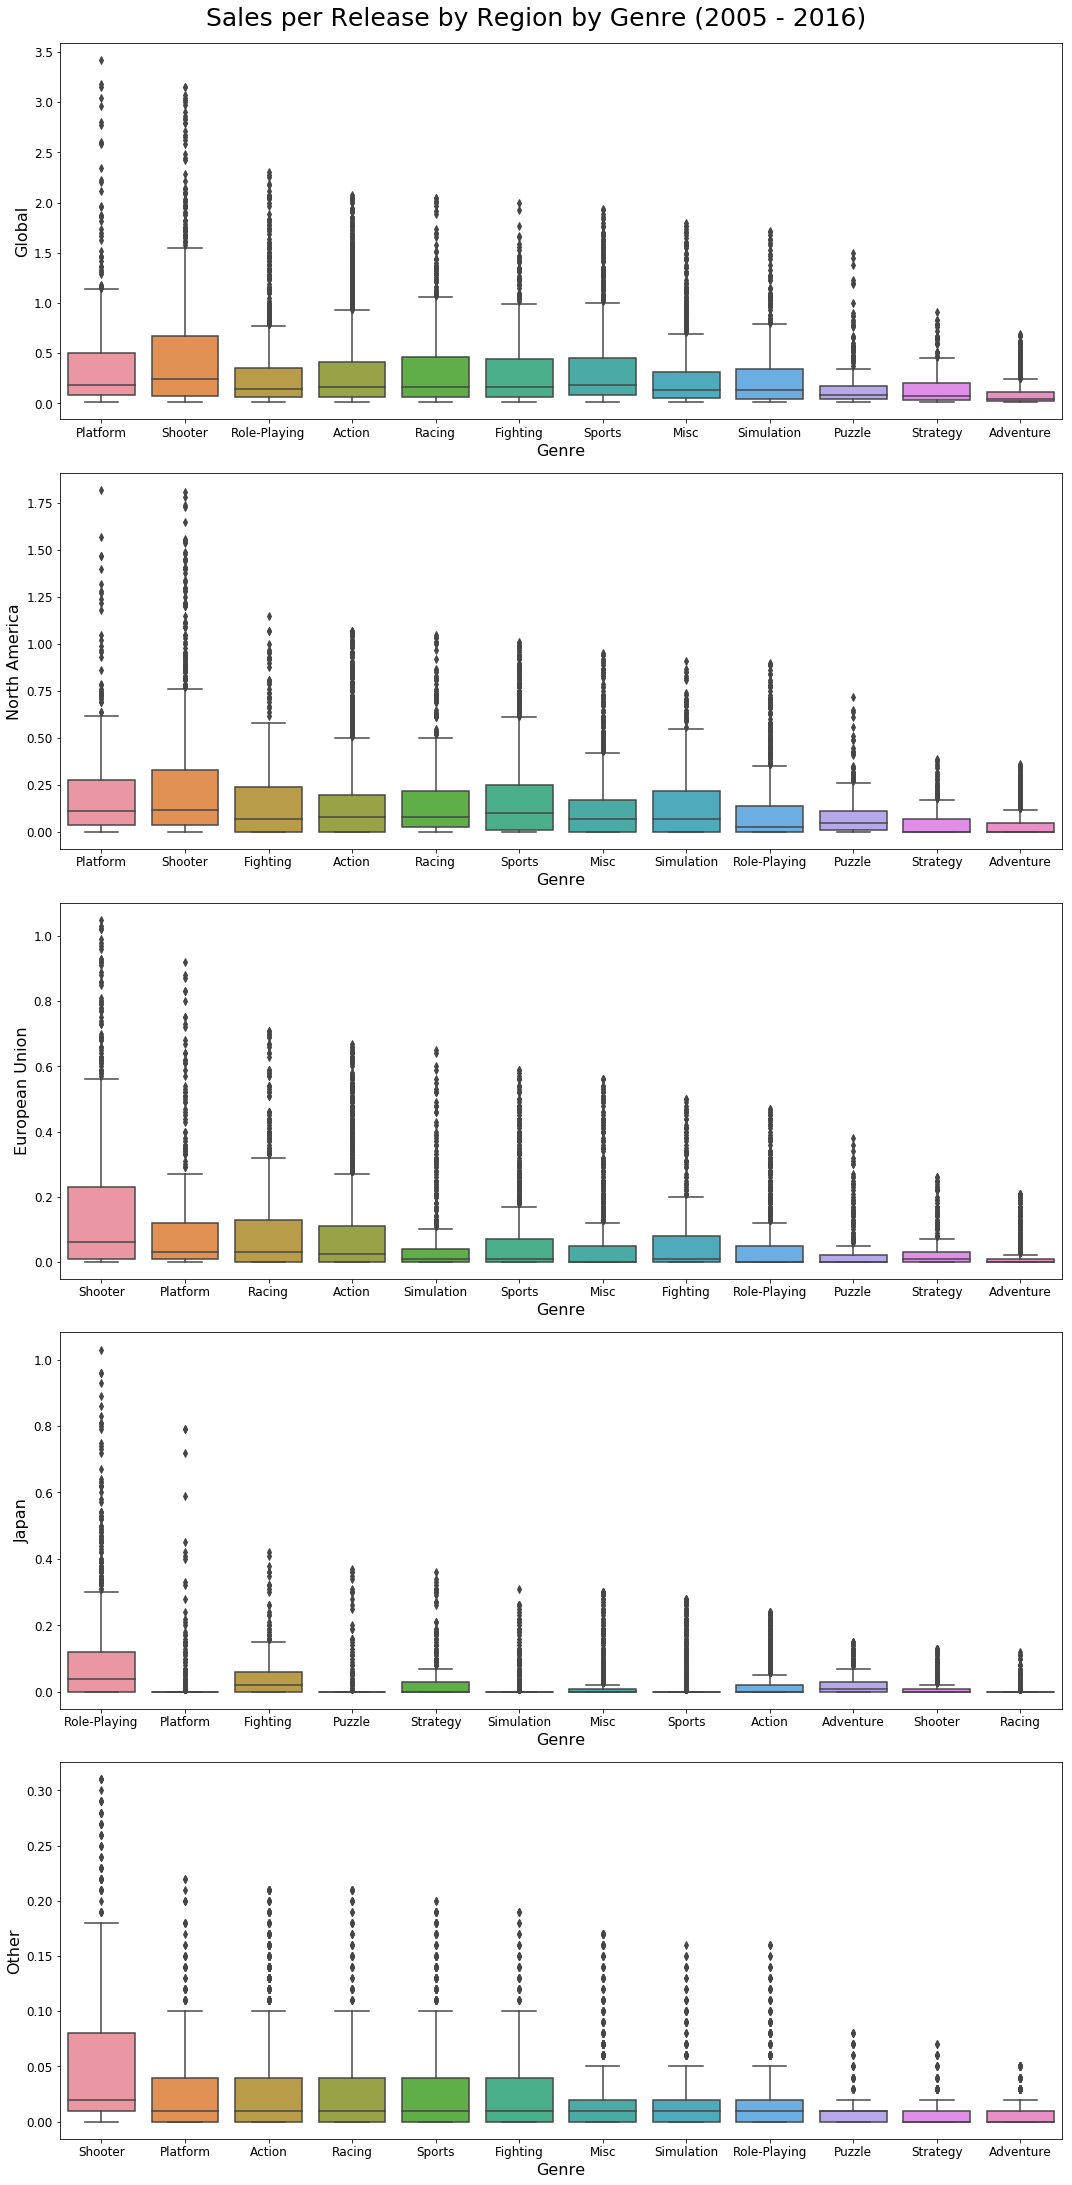

In [19]:
#boxplots
def percentileplot(salescol, groupbycol):
    dfplot = df2.groupby(groupbycol, as_index = True)[salescol].quantile(0.95)
    dfplot = pd.merge(df2, dfplot.to_frame().rename(columns = {salescol : 'Percentile'}), on = groupbycol, how='left')
    dfplot = dfplot[dfplot[salescol] < dfplot['Percentile']]
    #2005 forward
    dfplot = dfplot[dfplot['Year'] >= 2005]
    return dfplot


fig, axes = plt.subplots(nrows = 5, ncols = 1, figsize = (15,30))
regions = ['Global_Sales','NA_Sales','EU_Sales','JP_Sales','Other_Sales']
plt.suptitle('Sales per Release by Region by Genre (2005 - 2016)', fontsize = 25, y = 1.01)

for i, r in enumerate(regions):
    sns.boxplot(x = 'Genre', y = r, data = percentileplot(r,'Genre').sort_values(by = r, ascending = False), ax = axes[i])

regionslabel = ['Global','North America','European Union','Japan','Other']

for l in range(0,len(axes)):
    axes[l].set_xlabel('Genre', fontsize = 16)
    axes[l].tick_params(axis='both', which='major', labelsize=12)
    axes[l].set_ylabel(regionslabel[l], fontsize = 16)

plt.tight_layout()
#ax.set_ylabel('Global Sales', fontsize = 16)


Text(0.5,1,'Scatterplot of Global Sales in Millions $ by Genre')

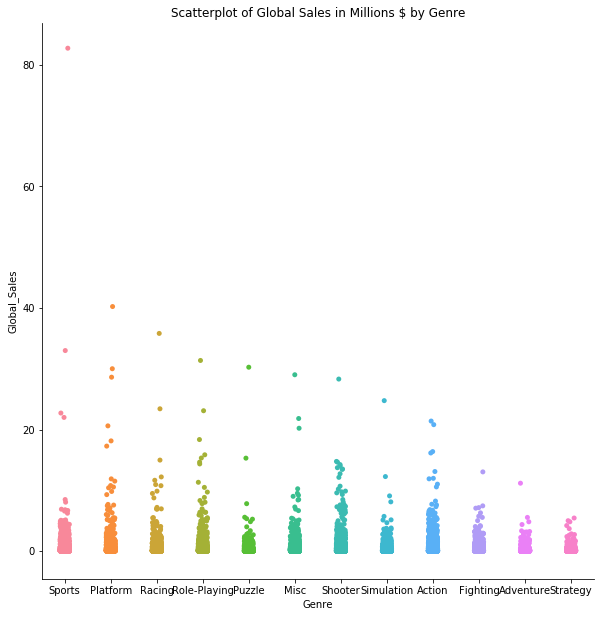

In [20]:
#check outliers
ax = sns.catplot(x = 'Genre',y = 'Global_Sales'
                , data = df2.sort_values(by = 'Global_Sales', ascending = False)
                , height = 8.5)
plt.tight_layout()
plt.title('Scatterplot of Global Sales in Millions $ by Genre')
#not many outliers in the 'action' category, might not be the best idea to release 'action' games

In [22]:
#Genre Region Median Sales/Release in Millions $ (2005 - 2016)
dfplot = df[df['Year'] >= 2005]
dfplot = dfplot.groupby(['Genre']).agg(np.median).loc[:, 'NA_Sales':'Global_Sales']
dfplot

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Genre,,,,,
Action,0.09,0.030,0.00,0.01,0.18
Adventure,0.00,0.000,0.01,0.00,0.04
Fighting,0.07,0.020,0.02,0.01,0.17
Misc,0.07,0.010,0.00,0.01,0.14
Platform,0.12,0.040,0.00,0.01,0.19
Puzzle,0.05,0.000,0.00,0.01,0.08
Racing,0.09,0.035,0.00,0.02,0.18
Role-Playing,0.04,0.000,0.05,0.01,0.15
Shooter,0.14,0.070,0.00,0.03,0.29


Text(-21,0.5,'Genre')

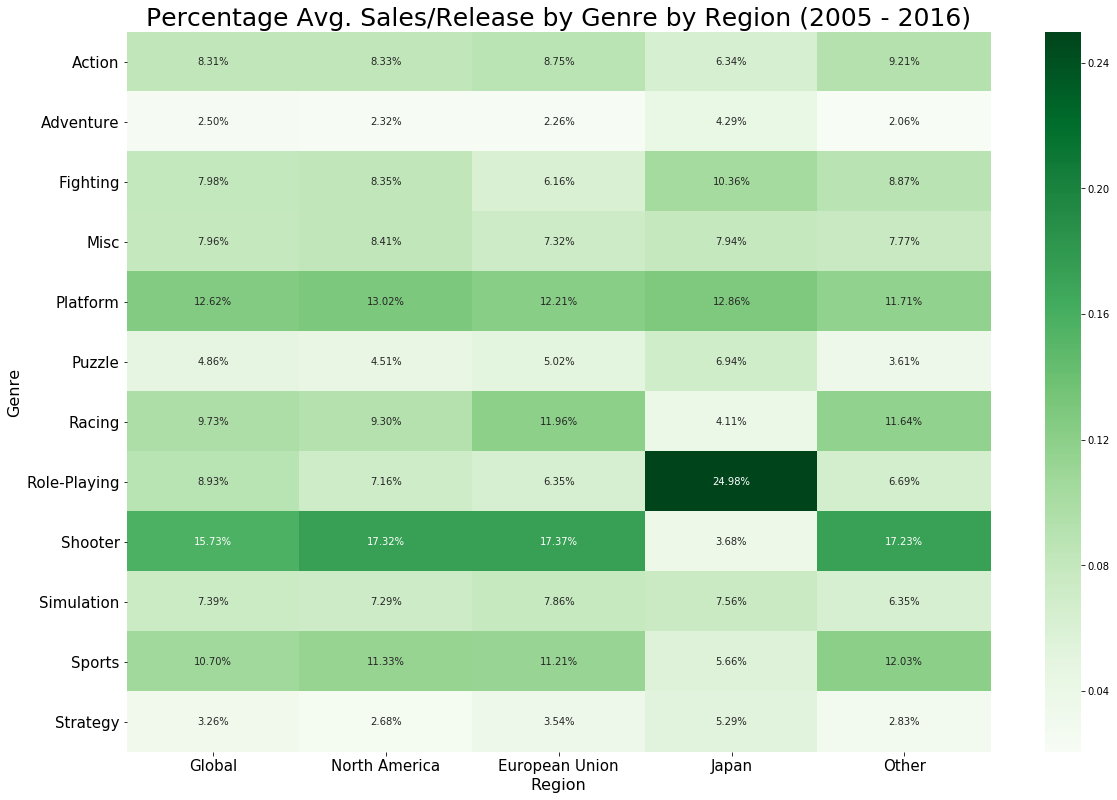

In [24]:
#Percentage Genre Region Median Sales/Release in Millions $ Heatmap (2005 - 2016)
dfplot = df[df['Year'] >= 2005]
dfplot = dfplot.groupby(['Genre']).agg(np.mean).loc[:, 'NA_Sales':'Global_Sales']
#convert to percentages to each region
dfplot['NA_Sales'] = dfplot['NA_Sales'] / dfplot['NA_Sales'].sum()
dfplot['EU_Sales'] = dfplot['EU_Sales'] / dfplot['EU_Sales'].sum()
dfplot['JP_Sales'] = dfplot['JP_Sales'] / dfplot['JP_Sales'].sum()
dfplot['Other_Sales'] = dfplot['Other_Sales'] / dfplot['Other_Sales'].sum()
dfplot['Global_Sales'] = dfplot['Global_Sales'] / dfplot['Global_Sales'].sum()

    
#re-arrange
cols = dfplot.columns.tolist()
cols = cols[-1:] + cols[:-1]
dfplot = dfplot[cols]
dfplot = dfplot.rename(columns = {'NA_Sales':'North America'
                              ,'EU_Sales':'European Union'
                              ,'Global_Sales':'Global'
                              ,'JP_Sales':'Japan'
                              ,'Other_Sales':'Other'})

ax = plt.figure(figsize=(15, 10)).add_axes([0,0,1,1])
#sns.set(font_scale=1)
sns.heatmap(dfplot, cmap = 'Greens', ax = ax, annot = True, fmt = '.2%') #YlGnBu
plt.title('Percentage Avg. Sales/Release by Genre by Region (2005 - 2016)', fontsize = 25)
ax.tick_params(axis='both', which='major', labelsize = 15)
ax.set_xlabel('Region',fontsize = 16)
ax.set_ylabel('Genre',fontsize = 16)

In [25]:
#market share
df2.groupby('Year')['JP_Sales'].sum() / df2.groupby('Year')['Global_Sales'].sum()

Year
1980    0.000000
1981    0.000000
1982    0.000000
1983    0.482430
1984    0.283360
1985    0.269930
1986    0.534394
1987    0.534959
1988    0.333757
1989    0.249966
1990    0.301276
1991    0.458579
1992    0.379596
1993    0.550892
1994    0.429329
1995    0.519237
1996    0.288426
1997    0.243159
1998    0.195111
1999    0.208302
2000    0.212195
2001    0.120252
2002    0.105583
2003    0.095571
2004    0.100601
2005    0.118383
2006    0.141505
2007    0.098849
2008    0.088761
2009    0.092747
2010    0.099102
2011    0.102831
2012    0.142342
2013    0.129282
2014    0.117082
2015    0.127515
2016    0.192807
dtype: float64

In [26]:
#correlation between releases and global sales and year
dfplot = df2.groupby(['Genre','Year'] , as_index = False)[['Name', 'Global_Sales']].agg({'Name' : 'count'
                                                                                ,'Global_Sales' : 'sum'})
dfplot.columns  = ['Genre', 'Year','Releases','Global_Sales']
dfplot.corr()
#more releases more sales

,Year,Releases,Global_Sales
Year,1.000000,0.531364,0.437603
Releases,0.531364,1.000000,0.861670
Global_Sales,0.437603,0.861670,1.000000


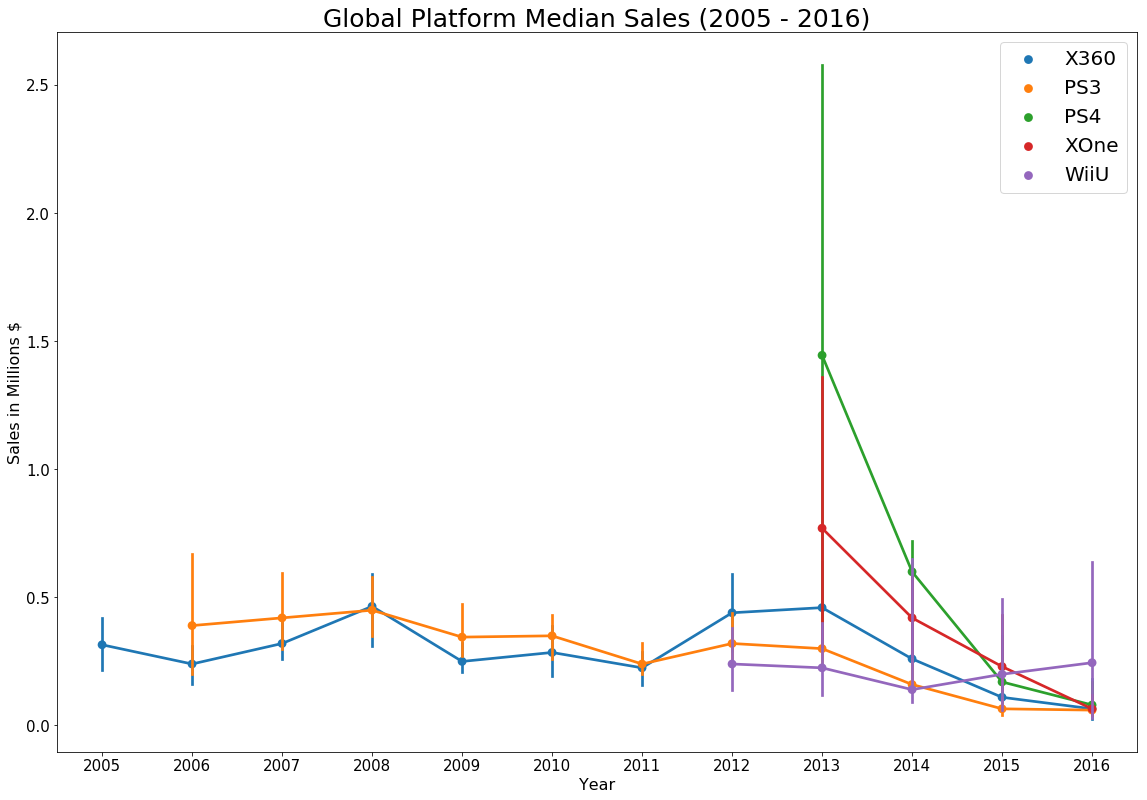

In [27]:
#platform trends across the year
a = df2[(df2['Year'] >= 2010)
        & (df2['Year'] <= 2015)].groupby('Platform', as_index = False)['Global_Sales'].median().sort_values(by = 'Global_Sales', ascending = False).iloc[:5]


ax = plt.figure(figsize=(15,10)).add_axes([0,0,1,1])

sns.pointplot(x = 'Year', y = 'Global_Sales'
              , data = df2[(df2['Platform'].isin(a['Platform'])) & (df2['Year'] >= 2005)]
              , hue = 'Platform', ax = ax
              , estimator = np.median)

plt.title('Global Platform Median Sales (2005 - 2016)', fontsize = 25)
ax.tick_params(axis='both', which='major', labelsize = 15)
ax.set_xlabel('Year',fontsize = 16)
ax.set_ylabel('Sales in Millions $',fontsize = 16)
plt.legend(fontsize = 20)
#look at 2010 - 2015 most popular platforms only




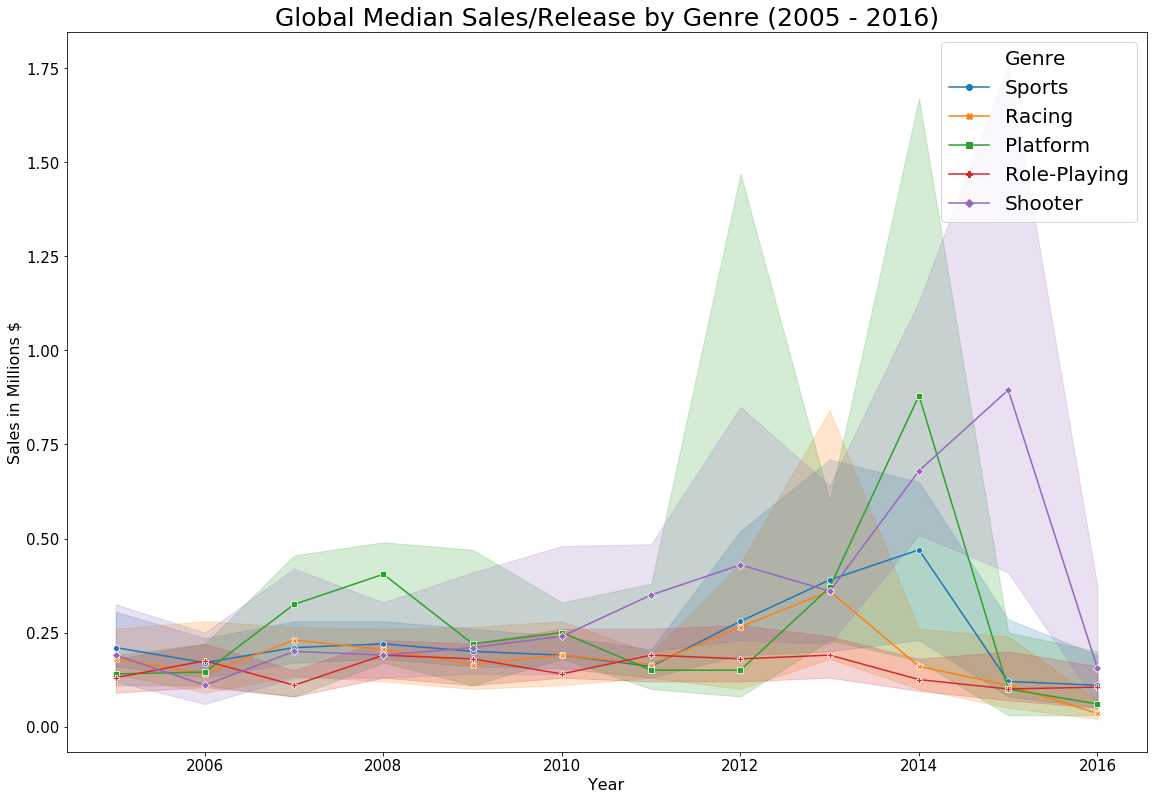

In [28]:
#top 5 most profitable sales/release genre between 2010 and 2015
tbl = df2[(df2['Year'] >= 2010) & (df2['Year'] <= 2015)]
tbl = tbl.groupby('Genre', as_index = False)[['Name','Global_Sales']].agg({'Name':'count', 'Global_Sales':'sum'}).rename(columns = {'Name':'Releases'})
tbl['Sales per Release'] = tbl['Global_Sales'] / tbl['Releases']
topgenre = tbl.sort_values(by = 'Sales per Release', ascending = False).iloc[:5,0]

ax = plt.figure(figsize = (15,10)).add_axes([0,0,1,1])
sns.lineplot(x = 'Year',y = 'Global_Sales', data = df2[df2['Genre'].isin(topgenre) & (df2['Year'] >= 2005)]
            , hue = 'Genre'
            , estimator = np.median
            , style = 'Genre'
            , markers = True
            , dashes = False)

plt.title('Global Median Sales/Release by Genre (2005 - 2016)', fontsize = 25)
ax.tick_params(axis='both', which='major', labelsize = 15)
ax.set_xlabel('Year',fontsize = 16)
ax.set_ylabel('Sales in Millions $',fontsize = 16)
plt.legend(fontsize = 20)

Text(0,0.5,'Sales in Millions $')

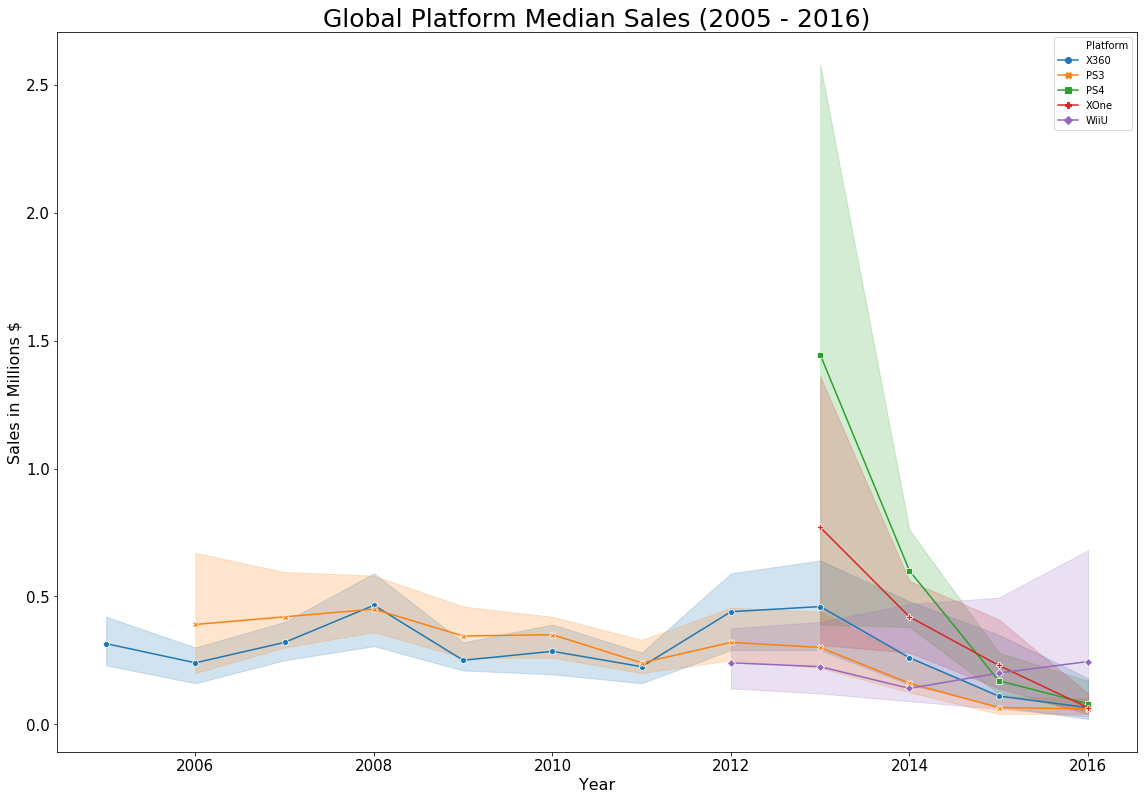

In [29]:
#platform trends across the year
a = df2[(df2['Year'] >= 2010)
        & (df2['Year'] <= 2015)].groupby('Platform', as_index = False)['Global_Sales'].median().sort_values(by = 'Global_Sales', ascending = False).iloc[:5]
dfplot = df2[(df2['Platform'].isin(a['Platform'])) & (df2['Year'] >= 2005)]
#dfplot = df2[(df2['Platform'].isin(a['Platform'])) & (df2['Year'] >= 2005)].groupby(['Platform','Year'], as_index = False).median()
#dfplot.head()



ax = plt.figure(figsize=(15,10)).add_axes([0,0,1,1])

sns.lineplot(x = 'Year', y = 'Global_Sales'
            , data = dfplot
            , hue = 'Platform'
            , ax = ax
            , markers = True
            , dashes = False
            , style = 'Platform'
            , estimator = np.median)

plt.title('Global Platform Median Sales (2005 - 2016)', fontsize = 25)
ax.tick_params(axis='both', which='major', labelsize = 15)
ax.set_xlabel('Year',fontsize = 16)
ax.set_ylabel('Sales in Millions $',fontsize = 16)
#plt.legend(fontsize = 20)
#look at 2010 - 2015 most popular platforms only


In [30]:
#turns out platformer have high sales due to outliers, shooter games are more likely to succeed in the future
#list of high sales platformer games and the publisher and total sales
df2[(df2['Genre'] == 'Platform') & (df2['Year'] > 2005)][['Name','Year','Publisher','Platform','Global_Sales']].sort_values(by = 'Global_Sales', ascending = False).head(10)

,Name,Year,Publisher,Platform,Global_Sales
6,New Super Mario Bros.,2006,Nintendo,DS,30.01
8,New Super Mario Bros. Wii,2009,Nintendo,Wii,28.62
48,Super Mario Galaxy,2007,Nintendo,Wii,11.52
53,Super Mario 3D Land,2011,Nintendo,3DS,10.79
64,New Super Mario Bros. 2,2012,Nintendo,3DS,9.82
91,Super Mario Galaxy 2,2010,Nintendo,Wii,7.69
125,Donkey Kong Country Returns,2010,Nintendo,Wii,6.59
148,LittleBigPlanet,2008,Sony Computer Entertainment,PS3,5.92
183,New Super Mario Bros. U,2012,Nintendo,WiiU,5.19
261,Super Mario 3D World,2013,Nintendo,WiiU,4.25


In [31]:
#shooter games top 10 highest sales
df2[(df2['Genre'] == 'Shooter') & (df2['Year'] > 2005)][['Name','Year','Publisher','Platform','Global_Sales']].sort_values(by = 'Global_Sales', ascending = False).head(10)

,Name,Year,Publisher,Platform,Global_Sales
29,Call of Duty: Modern Warfare 3,2011,Activision,X360,14.76
31,Call of Duty: Black Ops,2010,Activision,X360,14.64
33,Call of Duty: Black Ops 3,2015,Activision,PS4,14.24
34,Call of Duty: Black Ops II,2012,Activision,PS3,14.03
35,Call of Duty: Black Ops II,2012,Activision,X360,13.73
36,Call of Duty: Modern Warfare 2,2009,Activision,X360,13.51
37,Call of Duty: Modern Warfare 3,2011,Activision,PS3,13.46
40,Call of Duty: Black Ops,2010,Activision,PS3,12.73
43,Halo 3,2007,Microsoft Game Studios,X360,12.14
55,Call of Duty: Modern Warfare 2,2009,Activision,PS3,10.69


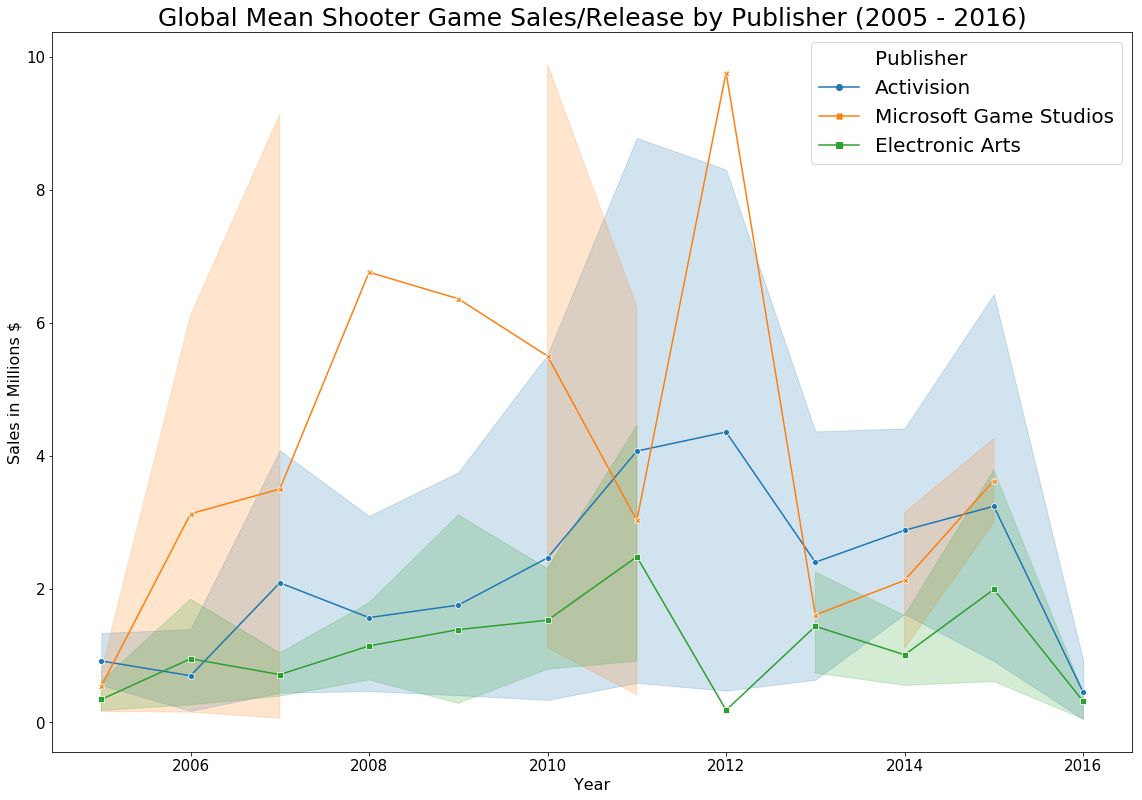

In [32]:
#Sales per Release by top 5 most popular Platform across the year
#Choose 5 most popular platform between the years 2010 - 2015
#shooting genre by publisher
tbl = df2[(df2['Year'] >= 2010) & (df2['Year'] <= 2015)]
#platformlist = tbl.groupby('Platform', as_index = False)['Global_Sales'].median().sort_values(by = 'Global_Sales'
#                                                                                           , ascending = False).iloc[:5,0]
publist = tbl[(tbl['Genre'] == 'Shooter')].groupby('Publisher', as_index = False)['Global_Sales'].sum().sort_values(by = 'Global_Sales'
                                                                                                                    , ascending = False).iloc[:3,0]
ax = plt.figure(figsize = (15,10)).add_axes([0,0,1,1])
sns.lineplot(x = 'Year', y = 'Global_Sales'
              , data = df2[#df2['Platform'].isin(platformlist) 
                            (df2['Genre'] == 'Shooter')
                            & (df2['Year'] >= 2005)
                            & (df2['Publisher'].isin(publist))]
              , hue = 'Publisher'
            , estimator = np.mean
            , markers = True
            , dashes = False
            , style = 'Publisher')
            #, err_style = 'None')

plt.title('Global Mean Shooter Game Sales/Release by Publisher (2005 - 2016)', fontsize = 25)
ax.tick_params(axis='both', which='major', labelsize = 15)
ax.set_xlabel('Year',fontsize = 16)
ax.set_ylabel('Sales in Millions $',fontsize = 16)
plt.legend(fontsize = 20)

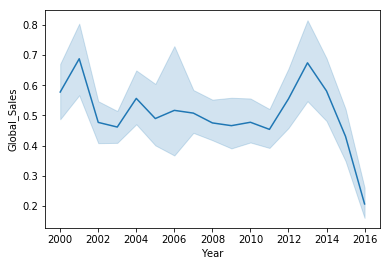

In [33]:
#sales/release average profitability
#not dipping as much as total sales
dfplot = df2[df2['Year'] >= 2000]
#dfplot = dfplot.groupby(['Year'], as_index = False)[['Name','Global_Sales']].agg({'Name':'count','Global_Sales' : 'sum'})

#dfplot['Sales per Release'] = dfplot['Global_Sales']/dfplot['Name']


sns.lineplot(x = 'Year',y = 'Global_Sales', data = dfplot, estimator = 'mean')

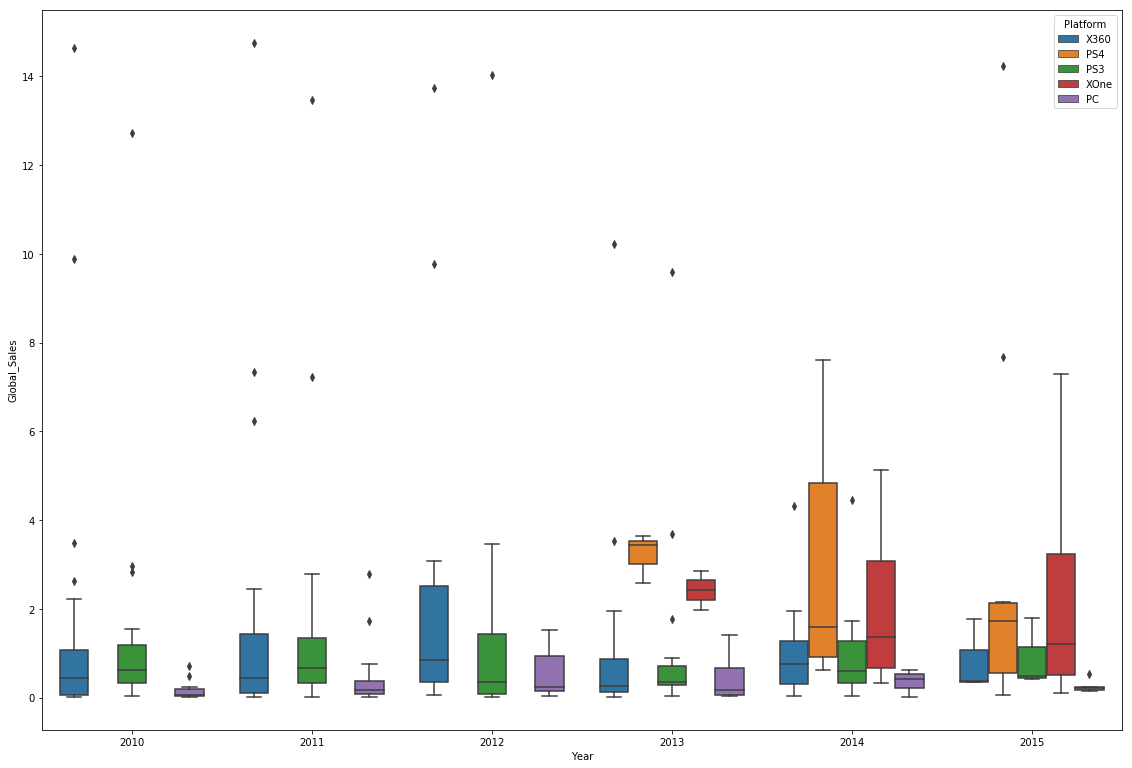

In [34]:
#most popular platformer for shooter
tbl = df2[(df2['Year'] >= 2010) & (df2['Year'] <= 2015)]
platformlist = tbl[(tbl['Genre']) == 'Shooter'].groupby('Platform', as_index = False)[['Platform','Global_Sales']].sum().sort_values(by = 'Global_Sales'
                                                                                      ,ascending = False).iloc[:5,0]
ax = plt.figure(figsize=(15,10)).add_axes([0,0,1,1])
tbl = tbl[(tbl['Platform'].isin(platformlist)) 
        & (tbl['Genre'] == 'Shooter')]
sns.boxplot(x = 'Year', y = 'Global_Sales', data = tbl, hue = 'Platform')

Text(0.5,1,'Number of Game Releases across the Years')

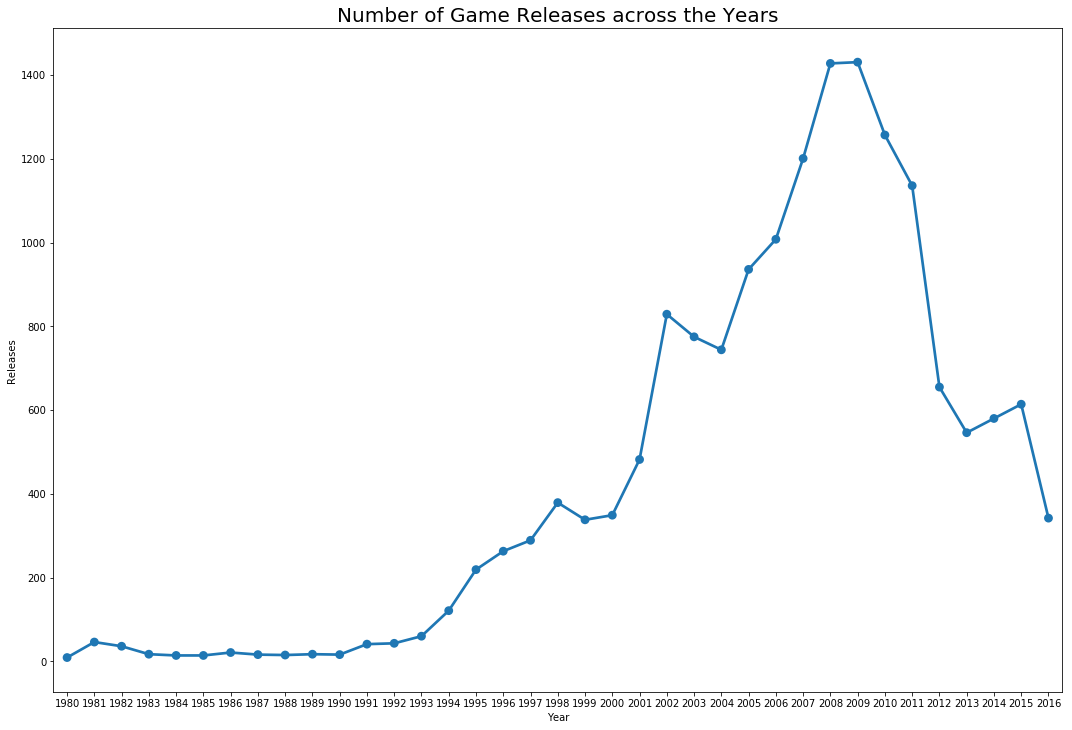

In [35]:
#releases by year trend
dfplot = df2.groupby(['Year'] , as_index = False)[['Name', 'Global_Sales']].agg({'Name' : 'count'
                                                                                ,'Global_Sales' : 'sum'})
dfplot.columns  = ['Year','Releases','Global_Sales']
plt.figure(figsize = (15,10))
dfplot['Year'] = dfplot['Year'].astype(np.int64)
ax = sns.pointplot(x = 'Year', y = 'Releases', data = dfplot)
plt.tight_layout()
plt.title('Number of Game Releases across the Years', fontsize = 20)

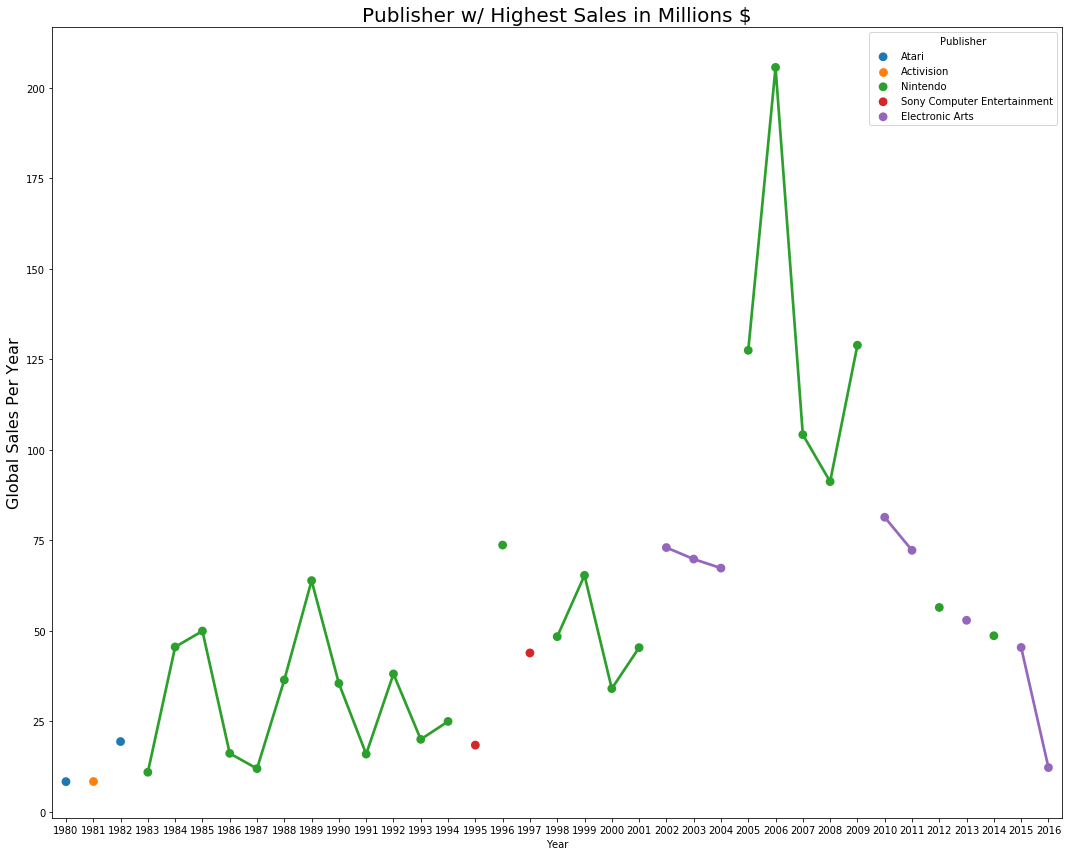

In [36]:
#Publisher with the highest sales by year
#nintendo dominates the market

tbl = df2.groupby(['Year','Publisher'],as_index=False)['Global_Sales'].sum().sort_values(by ='Year')
tbl = tbl[tbl['Global_Sales'] == tbl.groupby(['Year'])['Global_Sales'].transform(max)]
plt.figure(figsize=(15,12))
tbl['Year'] = tbl['Year'].astype(np.int64)
ax = sns.pointplot(x = 'Year',y = 'Global_Sales', data = tbl, hue = 'Publisher' )

ax.set_ylabel(ylabel='Global Sales Per Year', fontsize=16)
ax.set_title(label='Publisher w/ Highest Sales in Millions $', fontsize=20)

plt.tight_layout()

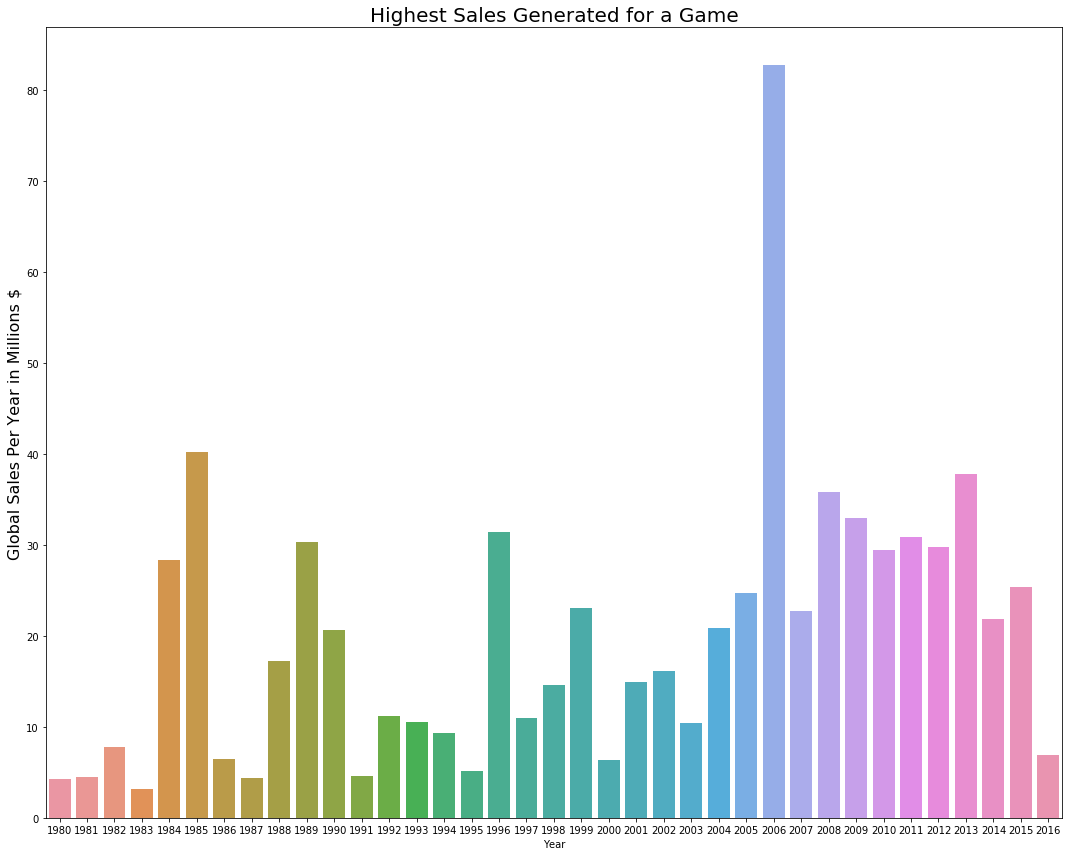

In [37]:
#Highest Sales by Game
tbl = df2.groupby(['Year','Name'],as_index=False)['Global_Sales'].sum().sort_values(by ='Year')
tbl = tbl[tbl['Global_Sales'] == tbl.groupby(['Year'])['Global_Sales'].transform(max)]
plt.figure(figsize=(15,12))
tbl['Year'] = tbl['Year'].astype(np.int64)

ax = sns.barplot(x = 'Year',y = 'Global_Sales', data = tbl)
ax.set_ylabel(ylabel='Global Sales Per Year in Millions $', fontsize=16)
ax.set_title(label='Highest Sales Generated for a Game', fontsize=20)
plt.tight_layout()

In [38]:
#Wii Sports has a whopping 82.74 million $
tbl.set_index('Year').sort_values(by = 'Global_Sales',ascending = False).head()

,Name,Global_Sales
Year,,
2006,Wii Sports,82.74
1985,Super Mario Bros.,40.24
2013,Grand Theft Auto V,37.78
2008,Mario Kart Wii,35.82
2009,Wii Sports Resort,33.00


In [39]:
#REGRESSION import
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

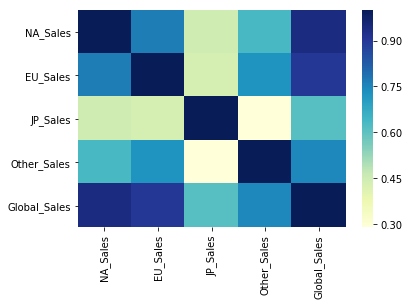

In [40]:
#Correlation
dfplot = df2.loc[:,'NA_Sales':'Global_Sales']
sns.heatmap(dfplot.corr(), cmap = 'YlGnBu')

#NA and EU Sales are highly correlated with global sales

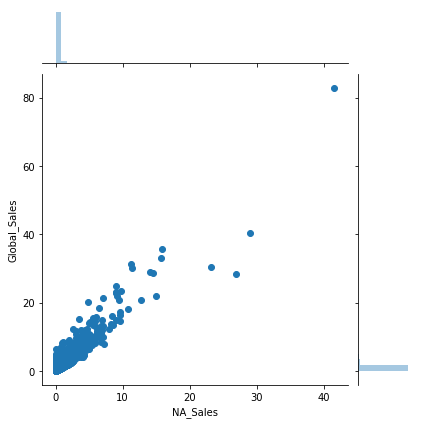

In [41]:
#global sales vs NA Sales
sns.jointplot(x = 'NA_Sales', y = 'Global_Sales', data = df2)

In [48]:
#converting all features to numbers
from sklearn.preprocessing import LabelEncoder
lb_make = LabelEncoder()
tbl = df2
#convert all categorical features to numbers
for c in df2.columns:
    if df2[c].dtype == 'object':
         tbl[c] = lb_make.fit_transform(df2[c])
tbl.head()

c:\users\niko hiananto\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,10846,26,2006,10,359,41.49,29.02,3.77,8.46,82.74
1,2,9198,11,1985,4,359,29.08,3.58,6.81,0.77,40.24
2,3,5491,26,2008,6,359,15.85,12.88,3.79,3.31,35.82
3,4,10848,26,2009,10,359,15.75,11.01,3.28,2.96,33.00
4,5,7244,5,1996,7,359,11.27,8.89,10.22,1.00,31.37


In [69]:
#split dataset to training and testing
tbl = tbl #tbl[tbl['Year'] >= 2005]
X = tbl[['NA_Sales']] #tbl.loc[:,'Name':'NA_Sales']
y = tbl['Global_Sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)
#Genre, platform, name, publisher scaled features does not improve testing score

In [70]:
#Linear Regression
lm  = LinearRegression()

In [71]:
lm.fit(X_train, y_train)
lm_score_train = lm.score(X_train, y_train)
print('Training score: ',lm_score_train)
lm_score_test = lm.score(X_test, y_test)
print('Testing score: ',lm_score_test)
print('Equation: ', str(lm.intercept_ ) + ' + ' + str(lm.coef_))

Training score:  0.8663786930850483
Testing score:  0.920877197586131
Equation:  0.040609145466284635 + [1.23698063e-04 1.73859515e+00]


In [62]:
predictions = lm.predict(X_test)

In [63]:
out_lr = pd.DataFrame({'Actual_Global_Sales': y_test, 'Predict_Global_Sales': predictions,'Diff' :(y_test-predictions)})
out_lr[['Actual_Global_Sales','Predict_Global_Sales','Diff']].head(5)

,Actual_Global_Sales,Predict_Global_Sales,Diff
2366,0.88,0.928608,-0.048608
12494,0.06,0.076601,-0.016601
123,6.60,4.927822,1.672178
14178,0.03,0.076601,-0.046601
7334,0.21,0.424359,-0.214359


Text(0,0.5,'Global Sales in Millions $')

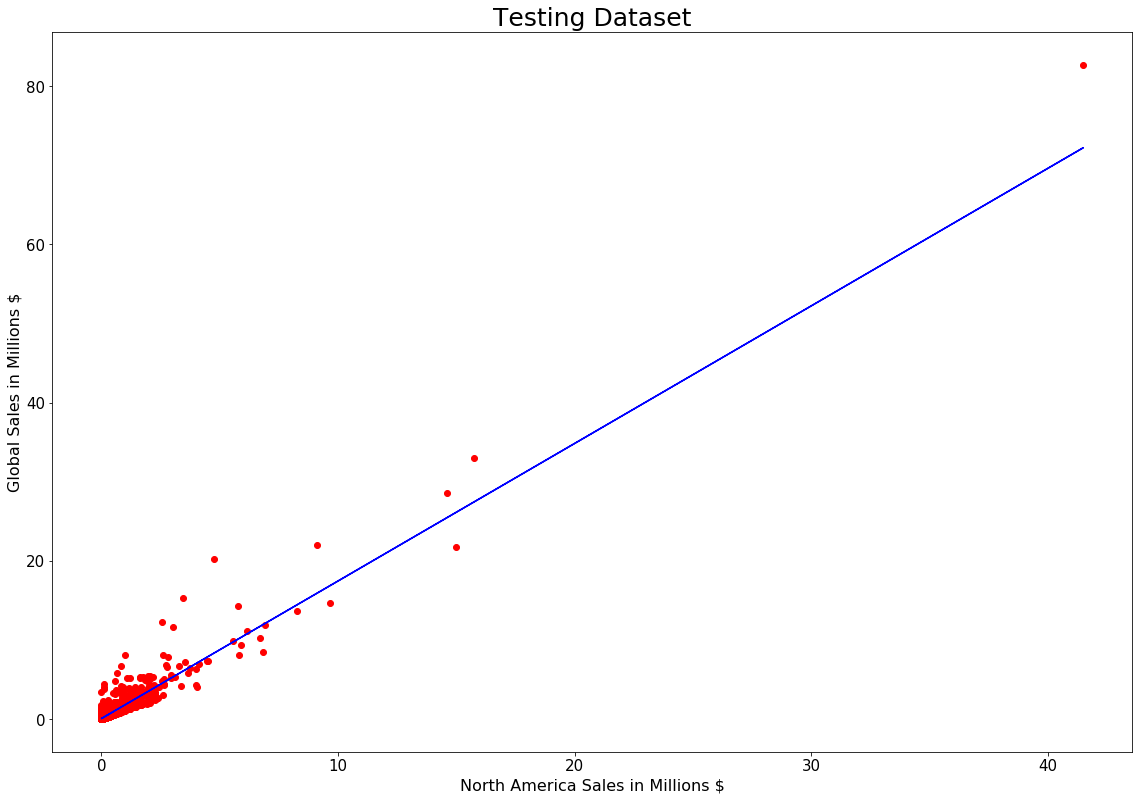

In [64]:
#test set graphs
ax = plt.figure(figsize = (15,10)).add_axes([0,0,1,1])
plt.scatter(X_test, y_test,color='red')
plt.plot(X_test, predictions, color='blue')

plt.title('Testing Dataset', fontsize = 25)
ax.tick_params(axis='both', which='major', labelsize = 15)
ax.set_xlabel('North America Sales in Millions $',fontsize = 16)
ax.set_ylabel('Global Sales in Millions $',fontsize = 16)

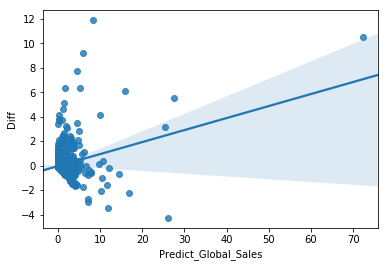

In [65]:
sns.regplot(out_lr['Predict_Global_Sales'],out_lr['Diff'])